In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
arr0 = [0,1,2,3,4,5]#python自带的创建数组的方法与使用

In [3]:
arr0[1:5:2]#数组的切片方法 开始：结束：步长 空着代表默认为全部


[1, 3]

In [4]:
arr0[1::1]

[1, 2, 3, 4, 5]

In [5]:
arr1 = np.array(arr0)#nunpy方法建立数组

In [6]:
arr1[[1,2]]#取序号为1到2的元素

array([1, 2])

In [7]:
cond = arr1>=3
cond  #特殊的条件判断

array([False, False, False,  True,  True,  True])

In [8]:
arr1[cond]#根据条件，选择为True的元素

array([3, 4, 5])

In [89]:
[arr1[i] for i in range(0,4)]#条件判别式   【循环的内容 for i in 范围】

[0, 1, 2, 3]

In [90]:
arr2 = np.full([3,3], 1)#特殊的建立数组的方式
arr2

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [91]:
arr2.shape


(3, 3)

In [92]:
arr2.dtype


dtype('int32')

In [93]:
arr2.size

9

In [94]:
np.save('D:/PyCode/data', arr2)
np.load('D:/PyCode/data.npy')

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [95]:
np.savez('./savez', x = arr1, y=arr2)#一次将多个数据存在一个文件内
np.load('./savez.npz')['x']

array([0, 1, 2, 3, 4, 5])

In [96]:
arr3 = np.random.randint(0,100,[3,3],int)
arr3 

array([[86, 34, 14],
       [50, 61, 81],
       [ 0,  2, 21]])

In [97]:
arr3[0,2]#取元素

14

In [98]:
arr3[0,[0,2,1]]#取0行0，2，1列元素

array([86, 14, 34])

In [99]:
arr3[arr3>50]

array([86, 61, 81])

In [100]:
arr3[0,0:3]#取0行0到3列元素

array([86, 34, 14])

In [101]:
arr3.reshape(1,9)

array([[86, 34, 14, 50, 61, 81,  0,  2, 21]])

In [102]:
np.concatenate([arr2, arr3],axis = 1)#拼合

array([[ 1,  1,  1, 86, 34, 14],
       [ 1,  1,  1, 50, 61, 81],
       [ 1,  1,  1,  0,  2, 21]])

In [103]:
np.split(arr3, [1,2],axis = 1)#拆，按行在第1，2列拆

[array([[86],
        [50],
        [ 0]]),
 array([[34],
        [61],
        [ 2]]),
 array([[14],
        [81],
        [21]])]

In [104]:
arr3.T#转置

array([[86, 50,  0],
       [34, 61,  2],
       [14, 81, 21]])

In [105]:
arr4 = arr3.mean(axis = 1)#求平均

In [106]:
arr3+arr4#广播机制  矩阵大小并不一致，但是也可以运算

array([[130.66666667,  98.        ,  21.66666667],
       [ 94.66666667, 125.        ,  88.66666667],
       [ 44.66666667,  66.        ,  28.66666667]])

In [107]:
np.sin(90*np.pi/180)

1.0

In [116]:
arr4 = np.full(3, 0)
arr5 = np.random.randint(0,100,3,int)
cond1 = arr5>50
arr5

array([99,  8, 61])

In [117]:
np.where(cond1,arr4,arr5)#'true选择第一个，false选择第二个

array([0, 8, 0])

如何根据两个或多个条件过滤numpy数组。加载营尾花数据，根据第一列小于5.0并且第三列大于1.5作为条件，进行数据筛选。
(提示，需要使用逻辑与运算:&)

In [119]:
iris = np.loadtxt('D:/PyCode/iris.csv',delimiter = ',')#读取文件，delimiter = ','代表分隔符为逗号

In [123]:
iris.shape#花萼的长度与宽度，花瓣的长度与宽度

(120, 5)

In [132]:
cond1 = iris[:,0]<5   #逗号分割行还是列，冒号填充行代表所有行
cond2 = iris[:,2]>1.5
iris = iris[cond1&cond2]
iris

array([[4.9, 2.5, 4.5, 1.7, 2. ],
       [4.7, 3.2, 1.6, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.9, 2.4, 3.3, 1. , 1. ],
       [4.8, 3.1, 1.6, 0.2, 0. ]])

计算鸢尾花数据每一行的softmax = ln(x)/求和ln(x)  得分 (exp表示自然底数e的幂运算ln（）) 

In [137]:
iris

array([[4.9, 2.5, 4.5, 1.7, 2. ],
       [4.7, 3.2, 1.6, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.9, 2.4, 3.3, 1. , 1. ],
       [4.8, 3.1, 1.6, 0.2, 0. ]])

In [167]:
hanghe = iris.sum(axis = 1).reshape(-1,1) #求每一行的和
hanghe

array([[15.6],
       [ 9.7],
       [10. ],
       [12.6],
       [ 9.7]])

In [163]:

sfmax = np.exp(iris)/np.exp(iris).sum(axis = 1).reshape(-1,1)#广播机制.exp是公式需要
sfmax =  sfmax.round(3)
sfmax

array([[0.539, 0.049, 0.361, 0.022, 0.03 ],
       [0.776, 0.173, 0.035, 0.009, 0.007],
       [0.766, 0.189, 0.031, 0.008, 0.006],
       [0.755, 0.062, 0.152, 0.015, 0.015],
       [0.805, 0.147, 0.033, 0.008, 0.007]])

In [159]:
def softmax(x):
    exp = np.exp(x)
    result =  exp/exp.sum(axis = 1).reshape(-1,1)
    return result.round(3)
result = softmax(iris)
result

array([[0.539, 0.049, 0.361, 0.022, 0.03 ],
       [0.776, 0.173, 0.035, 0.009, 0.007],
       [0.766, 0.189, 0.031, 0.008, 0.006],
       [0.755, 0.062, 0.152, 0.015, 0.015],
       [0.805, 0.147, 0.033, 0.008, 0.007]])

改变图片颜色

In [174]:
img = plt.imread('D:/PyCode/rose.jpg')
img[:2]
img.shape# 高度 宽度 通道

(180, 305, 3)

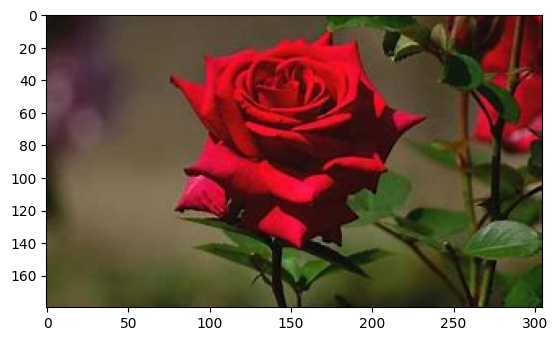

In [175]:
plt.imshow(img)

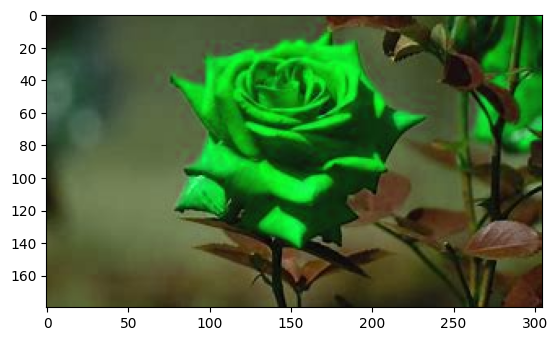

In [204]:
plt.imshow(img[:,:,::-1])#最后一个是三个通道，这里只是索引不能更改像素奥
plt.imshow(img[:,:,[1,0,2]])#最后一个是三个通道，这里只是索引不能更改像素奥

pands 数据处理分析  

In [206]:
pd.Series(data  = [0,3,5,7],index = ['a','b','c','d'])#一维数组，前面是值后面是索引

a    0
b    3
c    5
d    7
dtype: int64

In [215]:
data = pd.DataFrame(data  = [[0,5],[3,7]],columns =  ['a','b'],index = list('cd'),dtype = float)

In [217]:
data.head(1)
data.tail(1)

,a,b
c,0.0,5.0


In [225]:
data.info()
data.index
data.values
data.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, c to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       2 non-null      float64
 1   b       2 non-null      float64
dtypes: float64(2)
memory usage: 48.0+ bytes


,a,b
count,2.00000,2.000000
mean,1.50000,6.000000
std,2.12132,1.414214
min,0.00000,5.000000
25%,0.75000,5.500000
50%,1.50000,6.000000
75%,2.25000,6.500000
max,3.00000,7.000000


0.0

In [242]:
data.to_csv('D:/pyCode/pands.csv',sep = ',',header = True,index= True)#分隔符 是否保留行列索引


In [251]:
pd.read_csv('D:/pyCode/pands.csv',sep = ',',header = [0],index_col= [0])

,a,b
c,0.0,5.0
d,3.0,7.0


In [260]:
data['a']['c']
data.loc['c','a']

0.0

In [258]:
data[['a','b'] ]

,a,b
c,0.0,5.0
d,3.0,7.0


In [252]:
data.a

c    0.0
d    3.0
Name: a, dtype: float64

In [255]:
data.loc[['c','d'] ]
data.loc['c' ]

a    0.0
b    5.0
Name: c, dtype: float64

In [263]:
 
data.loc['c','a':'b']

a    0.0
b    5.0
Name: c, dtype: float64

In [264]:
data.loc['c','a':'b']>3

a    False
b     True
Name: c, dtype: bool

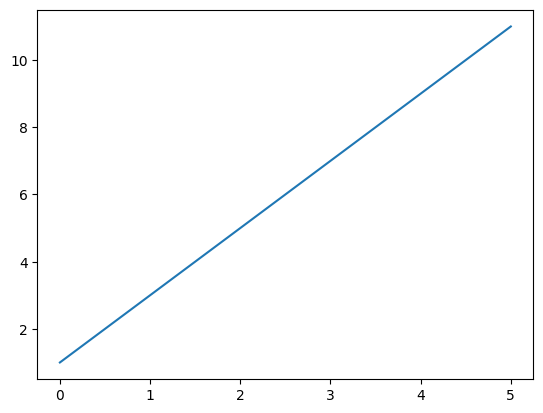

In [3]:
x = np.array([0,1,2,3,4,5])
y= x*2+1
plt.plot(x,y)

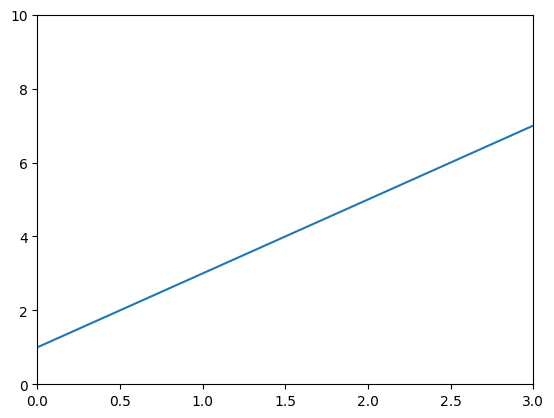

In [276]:
plt.xlim(0,3)
plt.ylim(0,10)
plt.plot(x,y)

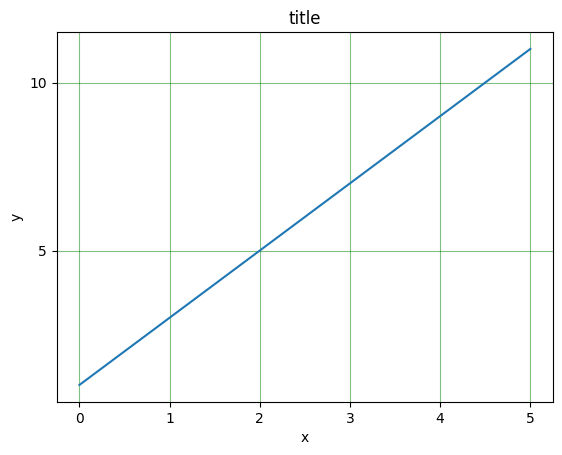

In [286]:
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color = 'green',alpha = 0.5)#透明度
plt.yticks([0,5,10])#刻度
plt.plot(x,y)

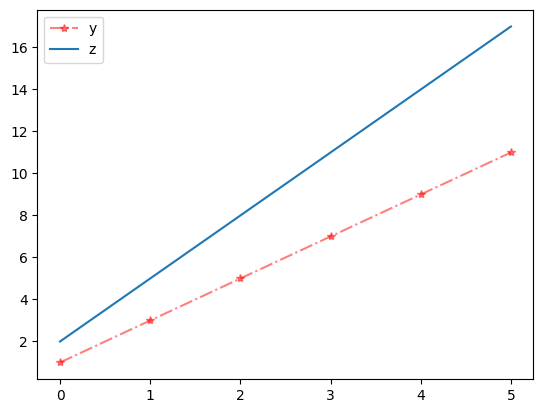

In [294]:
x = np.array([0,1,2,3,4,5])
y= x*2+1
z= x*3+2
plt.plot(x,y,color='red',ls = '-.',marker = '*' ,alpha = 0.5)#ls 代表线的样式 narker代表线上的样式 alpha是透明度
plt.plot(x,z)
plt.legend(['y','z'])
plt.savefig('D:/PyCode/plt.png',dpi = 300 )

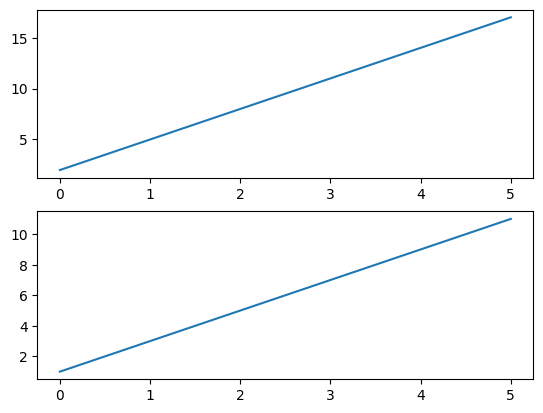

In [303]:
plt.subplot(2,1,1)
plt.plot(x,z)
plt.subplot(2,1,2)
plt.plot(x,y)

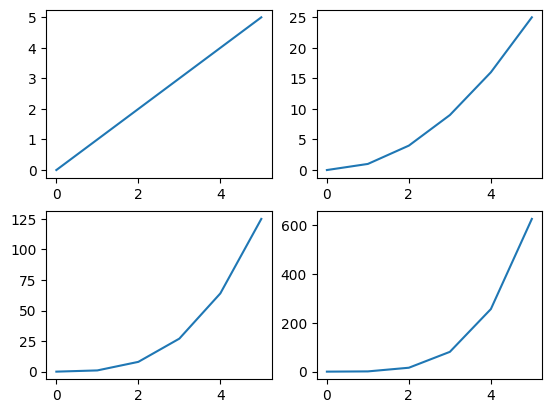

In [308]:
fig,axe =  plt.subplots(2,2)
x = np.array([0,1,2,3,4,5])
axe[0,0].plot(x,x)
axe[0,1].plot(x,x**2)
axe[1,0].plot(x,x**3)
axe[1,1].plot(x,x**4)


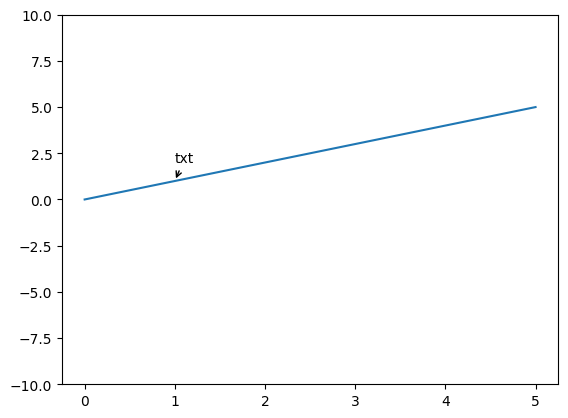

In [323]:
fig,ax =  plt.subplots()
x = np.array([0,1,2,3,4,5])
ax.set_ylim(-10,10)#设置y的范围     文本箭头位置，文本位置，箭头样式
ax.annotate('txt',xy = (1,1),xytext = (1,2),arrowprops =dict(arrowstyle = '->'))
ax.plot(x,x)

In [324]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


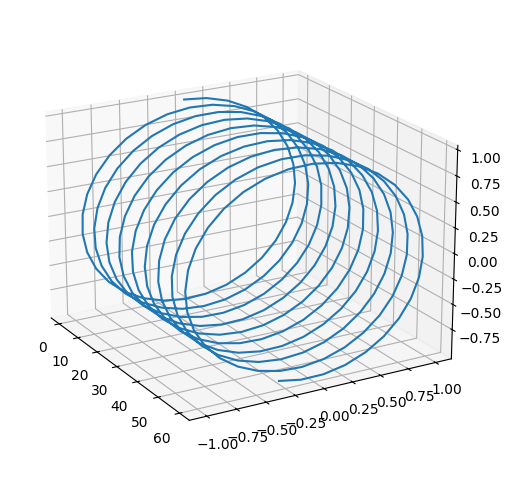

In [334]:
x = np.linspace(0,60,300)
y = np.sin(x)
z = np.cos(x)
fig = plt.figure(figsize=(9,6))
a3= plt.subplot(111,projection = '3d')
a3.plot(x,y,z)
a3.view_init(elev = 20,azim=-30)#旋转

In [4]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([1,2,3])
a1 = a[:,[0,1]]
a2= a[[0,1]]#默认就是行，没有行默认就是列，后面省略
b1 = b[[0,1]]

b1

array([1, 2])

In [10]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
a.reshape(-1,1) #-1代表平铺，1代表一个元素一个维度  如果-1 与1调换代表是按行还是按列平铺，-1在行行就是按列

a.reshape(1,-1)  #也可以把一维度数据升维度
a.reshape(-1)   #-1代表平铺  没有后面代表将数据降到一维度

array([1, 2, 3, 4, 5, 6])

In [2]:
np.clip([0,1,2,3,4,5,6,7],2,5)#裁剪

array([2, 2, 2, 3, 4, 5, 5, 5])

In [11]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [18]:
import torch

ModuleNotFoundError: No module named 'torch'